### Question 1: What is the Waterpoint Geographical Distribution?

Objective: Examine the distribution of current waterpoint across Tanzania. Observe if location relates with the status of the water point.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [3]:
df_map = pd.read_csv("../data/df_mappable.csv").drop(columns='Unnamed: 0')
print("3.05% of rows dropped from original data set due to missing coordinate data")
df_map.head(2)

3.05% of rows dropped from original data set due to missing coordinate data


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_num
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2


In [22]:
# Define a 'bounding box', or limit of map
BBox = (df_map.longitude.min(), df_map.longitude.max(),      
             df_map.latitude.min(), df_map.latitude.max())
# Import map of Tanzania set to the coordinates of the bounding box
t_map = plt.imread('../images/warmer_tanzania_map.jpg')

In [15]:
targets = ['functional', 'non functional', 'functional needs repair']
# Define color dictionary for target classes
#colors = {'non functional': 'yellow' , 'functional needs repair': 'purple', 'functional': 'deepskyblue'}
colors = {'non functional': '#ff9900' , 'functional needs repair': '#f8c2d3', 'functional': '#9cdce3'}
# Define title strings dict
titles = {'non functional': 'Non-Functional', 
          'functional needs repair': 'Functional (Needs Repair)', 
          'functional': 'Functional'}

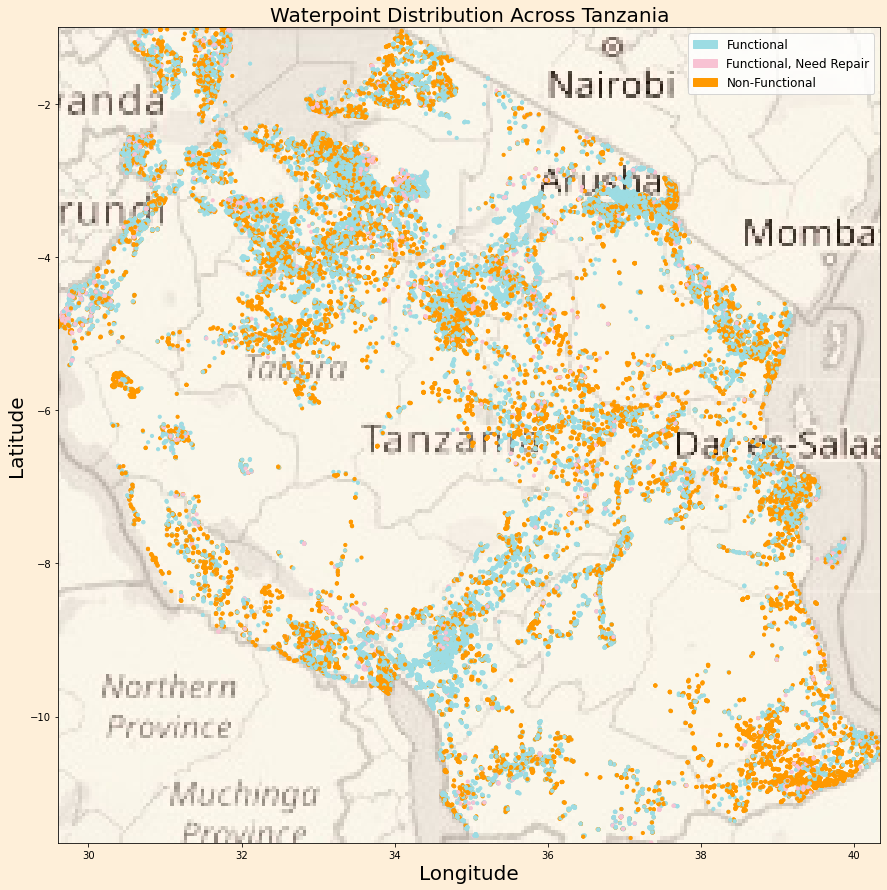

In [25]:
# Plot all three classes on one map
fig, ax = plt.subplots(figsize = (15, 15), facecolor='#feefd9')
ax.scatter(df_map.longitude, df_map.latitude, zorder=1, alpha= 1, c=df_map['status_group'].map(colors), s=10);
ax.set_title('Waterpoint Distribution Across Tanzania', fontsize = 20)
ax.set_xlabel('Longitude', fontsize = 20)
ax.set_ylabel('Latitude', fontsize = 20)

# Set limits of the figure to that of the bounding box
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

# Add the map to the background of the figure
ax.imshow(t_map, zorder=0, extent = BBox, aspect= 'equal')

# Build custom legend
func = mpatches.Patch(color='#9cdce3', label='Functional')
fnr = mpatches.Patch(color='#f8c2d3', label='Functional, Need Repair')
non = mpatches.Patch(color='#ff9900', label='Non-Functional')
plt.legend(handles=[func, fnr, non], fontsize = 12)

plt.show()

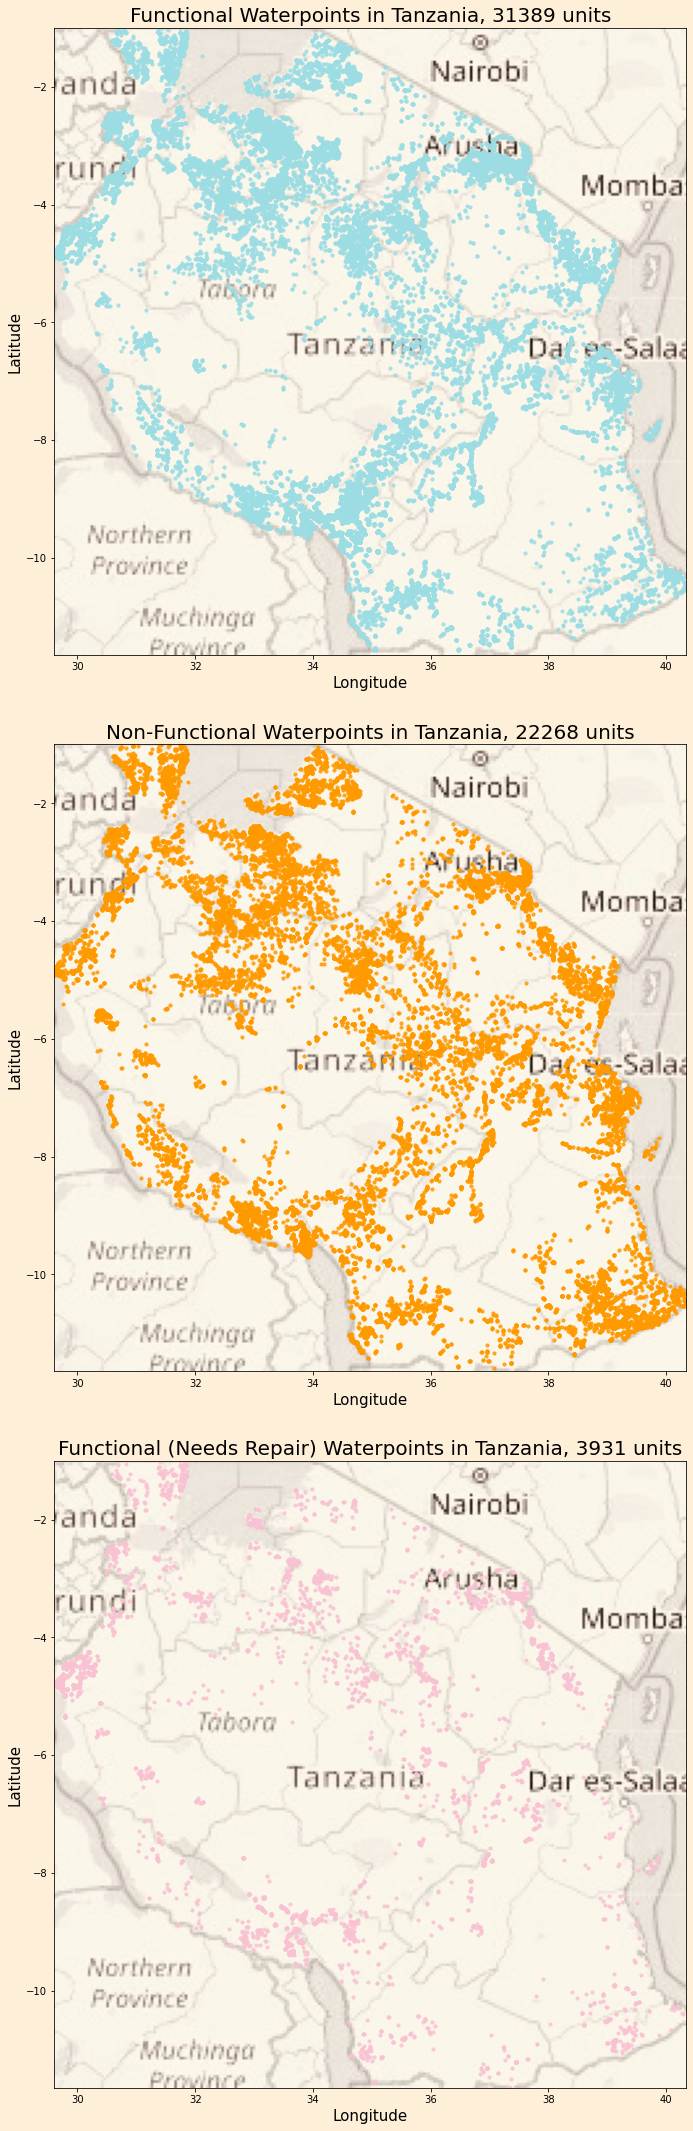

In [26]:
# Plot each target distribution seperately
fig = plt.figure(figsize=(10,30), facecolor='#feefd9')

for i, target in enumerate(targets):
    df_target = df_map[df_map['status_group'] == target]
    ax = fig.add_subplot(3,1,(i+1))
    ax.scatter(df_target.longitude, df_target.latitude, zorder=1, alpha= 0.8, c=colors.get(target), s=10);
    # Set limits of the figure to that of the bounding box
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    ax.set_xlabel('Longitude', fontsize = 15)
    ax.set_ylabel('Latitude', fontsize = 15)
    # Add the map to the background of the figure
    ax.imshow(t_map, zorder=0, extent = BBox, aspect= 'equal')
    ax.set_title(f"{titles.get(target)} Waterpoints in Tanzania, {len(df_target)} units", fontsize = 20)

plt.tight_layout()
plt.show()

### Rural Access Index (RAI)

*[Source](https://blogs.worldbank.org/opendata/road-sustainable-growth-measuring-access-rural-populations-0): On the road to sustainable growth: measuring access for rural populations
EDIE PURDIEADAM DIEHLATSUSHI IIMI|SEPTEMBER 12, 2016*

"The RAI measures the proportion of people who have access to an all-season road within 2 kilometers (km), considered a reasonable distance for people’s normal economic and social purposes." 

RAI is calculated based on population, road distributions, and road quality. 

"Around 33 million rural residents in Tanzania are unconnected to good roads."

For reference, this map displays the RAI measures from 2014 for Tanzania. Following a similar pattern to well placement.

![Tanzania RAI 2014](../images/tanzania_RAI_map.png)




### Conclusion:

The functionality of the water points seems (visually) to be evenly dispersed in a similar pattern to the location of the points. There is a notable cluster of 'non-functional' wells in the south-east. The current placement of the water points follws the outsourced map displaying Rural Access Index (RAI) across the country. It is both easier to install and maintain water points at locations that are easily accessible. I expected to see more non-functional waterpoints at more inaccessible locations, but that was not observed. The reletively even distribution is good news in that for the non-functioning water points, hopefully there are functioning ones within an accessible distance until repairs are made.


### Reccomendation:

Expand notice at non-functional points to the nearest functional point. Repair/replace pumps in areas with no or limited alternatives (or highest need) first. Investigate the south-east region.